https://github.com/frodokramer00/CompSci.git

The work have been distributed equally between all members 33% for each, in each part.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random
import json
import sympy as sp

Part 1.1

Random Network: Let's start by building a Random Network, acting as a baseline (or "null model") to understand the Computational Social Scientists Network better.

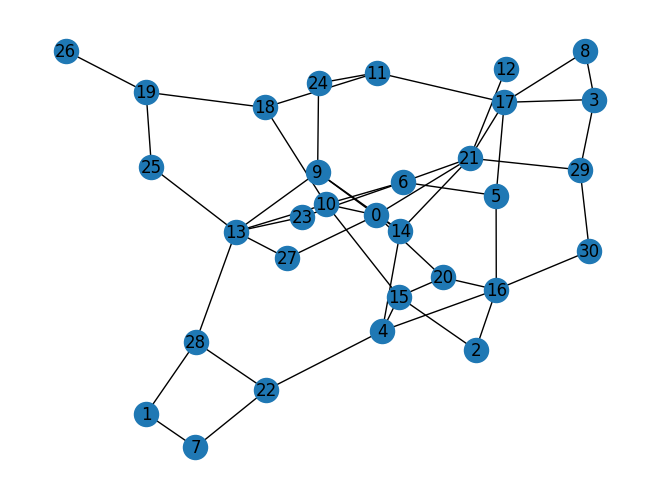

In [3]:
# Set seed for reproducibility
np.random.seed(1)
random.seed(1)


def generate_random_network(N,P):
    G=nx.erdos_renyi_graph(N,P)
    return G

def visualize_network(G):
    nx.draw(G, with_labels=True)
    plt.show()
N = 31
P = 0.1

random_network = generate_random_network(N,P)
visualize_network(random_network)


---

$$

Calculate the probability (p) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network.
After finding p, figure out the average degree.

In our dataset we have X numer of edges and Y Nodes

In [4]:
#Checking the number of edges in the network
with open('computational_social_scientists_network.json', 'r') as file:
    data = json.load(file)
links = data['links']
edge_count = len(links)
print(edge_count)

494


$E=P*\frac{(N*(N-1))}{2}$ can be rewritten as $P=\frac{2*E}{N *(N-1)}$

In [5]:
E=494 #number of edges
p_act=(2*E)/(N *(N-1)) #Probaility of p

k=p_act*(N-1) #avg degree

p_act,k


(1.0623655913978494, 31.87096774193548)

We observe to have X edges, and the average degree being Z. 

$$

---

Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated p. Generate a random network by linking nodes in every possible pair with probability p

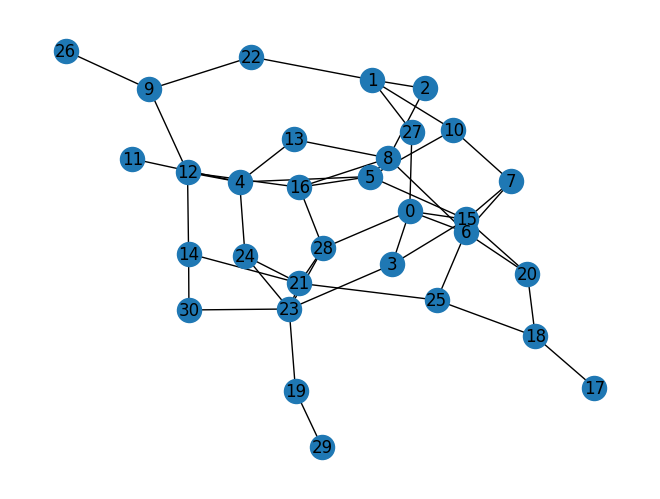

In [6]:
# Set seed for reproducibility
np.random.seed(1)
random.seed(1)


def mirror_random_network(N, P):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.uniform(0, 1) < P:
                G.add_edge(i, j)
    return G

custom_random_network = mirror_random_network(N, P)
visualize_network(custom_random_network)

---------------------

What regime does your random network fall into? Is it above or below the critical threshold?
According to the textbook, what does the network's structure resemble in this regime?
Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

$$

The network with P=0.2 and N=50 probably falls into the Supercritical Regime since the value of P is larger than 1/N.
This is the "threshhold" for a giant connected component, and seems to resemble real world systems, due to it looking like a big network.

The random networks seems to have relatively low clustering compared to the actual networks. This would make sense since the structures in a real network wouldnt be distrubuted as binomial in the same way with probabilities, but would probably have some clusters around specific nodes.




In [7]:
#Supercritical test
print(P,1/N,P>1/N)

0.1 0.03225806451612903 True


------------------------------------------------------------------------------

Part 1.2

Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path.

G = nx.read_edgelist('computational_social_scientist_network.json')

In [10]:
#Load the network
G = nx.read_edgelist('computational_social_scientists_network.json')

#Find connected comnponents
components = list(nx.algorithms.connected_components(G))

#Find the largest connected component
largest_component = max(components, key=len)

#Create a subgraph of G of the largest connected component
largest_component_subgraph=G.subgraph(largest_component)

print(components,largest_component,largest_component_subgraph)

TypeError: Failed to convert edge data (['"multigraph":', 'false,', '"graph":', '{},', '"nodes":', '[{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2263016,', '"first_publication_year":', '1929,', '"id":', '"', '"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '6117790,', '"first_publication_year":', '1929,', '"id":', '"\'"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2263016,', '"first_publication_year":', '1929,', '"id":', '","},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"."},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '9176685,', '"first_publication_year":', '1929,', '"id":', '"/"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '5459344,', '"first_publication_year":', '1929,', '"id":', '"0"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2862579,', '"first_publication_year":', '1929,', '"id":', '"1"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2300500,', '"first_publication_year":', '1954,', '"id":', '"2"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2354251,', '"first_publication_year":', '1929,', '"id":', '"3"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2425795,', '"first_publication_year":', '1929,', '"id":', '"4"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '5334570,', '"first_publication_year":', '1929,', '"id":', '"5"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2548921,', '"first_publication_year":', '1954,', '"id":', '"6"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2511471,', '"first_publication_year":', '1929,', '"id":', '"7"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2550290,', '"first_publication_year":', '1929,', '"id":', '"8"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '":"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"A"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '795879,', '"first_publication_year":', '1929,', '"id":', '"["},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '795879,', '"first_publication_year":', '1929,', '"id":', '"]"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"a"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '6117790,', '"first_publication_year":', '1929,', '"id":', '"e"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"g"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"h"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"l"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"n"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '6117790,', '"first_publication_year":', '1929,', '"id":', '"o"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '6117790,', '"first_publication_year":', '1929,', '"id":', '"p"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"r"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"s"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '6117790,', '"first_publication_year":', '1929,', '"id":', '"t"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '3058895,', '"first_publication_year":', '1929,', '"id":', '"x"},', '{"display_name":', 'null,', '"country":', 'null,', '"citation_count":', '2241229,', '"first_publication_year":', '1929,', '"id":', '"9"}],', '"links":', '[{"weight":', '225812,', '"source":', '"', '",', '"target":', '"\'"},', '{"weight":', '90439,', '"source":', '"', '",', '"target":', '","},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"."},', '{"weight":', '338718,', '"source":', '"', '",', '"target":', '"/"},', '{"weight":', '200248,', '"source":', '"', '",', '"target":', '"0"},', '{"weight":', '105147,', '"source":', '"', '",', '"target":', '"1"},', '{"weight":', '86397,', '"source":', '"', '",', '"target":', '"2"},', '{"weight":', '90494,', '"source":', '"', '",', '"target":', '"3"},', '{"weight":', '91621,', '"source":', '"', '",', '"target":', '"4"},', '{"weight":', '200477,', '"source":', '"', '",', '"target":', '"5"},', '{"weight":', '89929,', '"source":', '"', '",', '"target":', '"6"},', '{"weight":', '91855,', '"source":', '"', '",', '"target":', '"7"},', '{"weight":', '91475,', '"source":', '"', '",', '"target":', '"8"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '":"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"A"},', '{"weight":', '22467,', '"source":', '"', '",', '"target":', '"["},', '{"weight":', '22467,', '"source":', '"', '",', '"target":', '"]"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"a"},', '{"weight":', '225812,', '"source":', '"', '",', '"target":', '"e"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"g"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"h"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"l"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"n"},', '{"weight":', '225812,', '"source":', '"', '",', '"target":', '"o"},', '{"weight":', '225812,', '"source":', '"', '",', '"target":', '"p"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"r"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"s"},', '{"weight":', '225812,', '"source":', '"', '",', '"target":', '"t"},', '{"weight":', '112906,', '"source":', '"', '",', '"target":', '"x"},', '{"weight":', '33986,', '"source":', '"', '",', '"target":', '"', '"},', '{"weight":', '81417,', '"source":', '"', '",', '"target":', '"9"},', '{"weight":', '256075,', '"source":', '"\'",', '"target":', '"\'"},', '{"weight":', '225812,', '"source":', '"\'",', '"target":', '","},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"."},', '{"weight":', '859014,', '"source":', '"\'",', '"target":', '"/"},', '{"weight":', '508430,', '"source":', '"\'",', '"target":', '"0"},', '{"weight":', '266122,', '"source":', '"\'",', '"target":', '"1"},', '{"weight":', '219272,', '"source":', '"\'",', '"target":', '"2"},', '{"weight":', '228702,', '"source":', '"\'",', '"target":', '"3"},', '{"weight":', '232342,', '"source":', '"\'",', '"target":', '"4"},', '{"weight":', '508928,', '"source":', '"\'",', '"target":', '"5"},', '{"weight":', '228086,', '"source":', '"\'",', '"target":', '"6"},', '{"weight":', '233082,', '"source":', '"\'",', '"target":', '"7"},', '{"weight":', '232134,', '"source":', '"\'",', '"target":', '"8"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '":"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"A"},', '{"weight":', '60526,', '"source":', '"\'",', '"target":', '"["},', '{"weight":', '60526,', '"source":', '"\'",', '"target":', '"]"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"a"},', '{"weight":', '572676,', '"source":', '"\'",', '"target":', '"e"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"g"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"h"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"l"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"n"},', '{"weight":', '572676,', '"source":', '"\'",', '"target":', '"o"},', '{"weight":', '572676,', '"source":', '"\'",', '"target":', '"p"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"r"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"s"},', '{"weight":', '572676,', '"source":', '"\'",', '"target":', '"t"},', '{"weight":', '286338,', '"source":', '"\'",', '"target":', '"x"},', '{"weight":', '206282,', '"source":', '"\'",', '"target":', '"9"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"."},', '{"weight":', '338718,', '"source":', '",",', '"target":', '"/"},', '{"weight":', '200248,', '"source":', '",",', '"target":', '"0"},', '{"weight":', '105147,', '"source":', '",",', '"target":', '"1"},', '{"weight":', '86397,', '"source":', '",",', '"target":', '"2"},', '{"weight":', '90494,', '"source":', '",",', '"target":', '"3"},', '{"weight":', '91621,', '"source":', '",",', '"target":', '"4"},', '{"weight":', '200477,', '"source":', '",",', '"target":', '"5"},', '{"weight":', '89929,', '"source":', '",",', '"target":', '"6"},', '{"weight":', '91855,', '"source":', '",",', '"target":', '"7"},', '{"weight":', '91475,', '"source":', '",",', '"target":', '"8"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '":"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"A"},', '{"weight":', '22467,', '"source":', '",",', '"target":', '"["},', '{"weight":', '22467,', '"source":', '",",', '"target":', '"]"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"a"},', '{"weight":', '225812,', '"source":', '",",', '"target":', '"e"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"g"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"h"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"l"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"n"},', '{"weight":', '225812,', '"source":', '",",', '"target":', '"o"},', '{"weight":', '225812,', '"source":', '",",', '"target":', '"p"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"r"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"s"},', '{"weight":', '225812,', '"source":', '",",', '"target":', '"t"},', '{"weight":', '112906,', '"source":', '",",', '"target":', '"x"},', '{"weight":', '33986,', '"source":', '",",', '"target":', '","},', '{"weight":', '81417,', '"source":', '",",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '".",', '"target":', '"."},', '{"weight":', '429507,', '"source":', '".",', '"target":', '"/"},', '{"weight":', '254215,', '"source":', '".",', '"target":', '"0"},', '{"weight":', '133061,', '"source":', '".",', '"target":', '"1"},', '{"weight":', '109636,', '"source":', '".",', '"target":', '"2"},', '{"weight":', '114351,', '"source":', '".",', '"target":', '"3"},', '{"weight":', '116171,', '"source":', '".",', '"target":', '"4"},', '{"weight":', '254464,', '"source":', '".",', '"target":', '"5"},', '{"weight":', '114043,', '"source":', '".",', '"target":', '"6"},', '{"weight":', '116541,', '"source":', '".",', '"target":', '"7"},', '{"weight":', '116067,', '"source":', '".",', '"target":', '"8"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '":"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"A"},', '{"weight":', '30263,', '"source":', '".",', '"target":', '"["},', '{"weight":', '30263,', '"source":', '".",', '"target":', '"]"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"a"},', '{"weight":', '286338,', '"source":', '".",', '"target":', '"e"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"g"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"h"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"l"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"n"},', '{"weight":', '286338,', '"source":', '".",', '"target":', '"o"},', '{"weight":', '286338,', '"source":', '".",', '"target":', '"p"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '".",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '".",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '".",', '"target":', '"9"},', '{"weight":', '598866,', '"source":', '"/",', '"target":', '"/"},', '{"weight":', '762645,', '"source":', '"/",', '"target":', '"0"},', '{"weight":', '399183,', '"source":', '"/",', '"target":', '"1"},', '{"weight":', '328908,', '"source":', '"/",', '"target":', '"2"},', '{"weight":', '343053,', '"source":', '"/",', '"target":', '"3"},', '{"weight":', '348513,', '"source":', '"/",', '"target":', '"4"},', '{"weight":', '763392,', '"source":', '"/",', '"target":', '"5"},', '{"weight":', '342129,', '"source":', '"/",', '"target":', '"6"},', '{"weight":', '349623,', '"source":', '"/",', '"target":', '"7"},', '{"weight":', '348201,', '"source":', '"/",', '"target":', '"8"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '":"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"A"},', '{"weight":', '90789,', '"source":', '"/",', '"target":', '"["},', '{"weight":', '90789,', '"source":', '"/",', '"target":', '"]"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"a"},', '{"weight":', '859014,', '"source":', '"/",', '"target":', '"e"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"g"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"h"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"l"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"n"},', '{"weight":', '859014,', '"source":', '"/",', '"target":', '"o"},', '{"weight":', '859014,', '"source":', '"/",', '"target":', '"p"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"r"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"s"},', '{"weight":', '859014,', '"source":', '"/",', '"target":', '"t"},', '{"weight":', '429507,', '"source":', '"/",', '"target":', '"x"},', '{"weight":', '309423,', '"source":', '"/",', '"target":', '"9"},', '{"weight":', '210784,', '"source":', '"0",', '"target":', '"0"},', '{"weight":', '232324,', '"source":', '"0",', '"target":', '"1"},', '{"weight":', '191981,', '"source":', '"0",', '"target":', '"2"},', '{"weight":', '201123,', '"source":', '"0",', '"target":', '"3"},', '{"weight":', '203807,', '"source":', '"0",', '"target":', '"4"},', '{"weight":', '450068,', '"source":', '"0",', '"target":', '"5"},', '{"weight":', '198659,', '"source":', '"0",', '"target":', '"6"},', '{"weight":', '204086,', '"source":', '"0",', '"target":', '"7"},', '{"weight":', '204402,', '"source":', '"0",', '"target":', '"8"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '":"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"A"},', '{"weight":', '53967,', '"source":', '"0",', '"target":', '"["},', '{"weight":', '53967,', '"source":', '"0",', '"target":', '"]"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"a"},', '{"weight":', '508430,', '"source":', '"0",', '"target":', '"e"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"g"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"h"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"l"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"n"},', '{"weight":', '508430,', '"source":', '"0",', '"target":', '"o"},', '{"weight":', '508430,', '"source":', '"0",', '"target":', '"p"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"r"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"s"},', '{"weight":', '508430,', '"source":', '"0",', '"target":', '"t"},', '{"weight":', '254215,', '"source":', '"0",', '"target":', '"x"},', '{"weight":', '180165,', '"source":', '"0",', '"target":', '"9"},', '{"weight":', '98768,', '"source":', '"1",', '"target":', '"2"},', '{"weight":', '103839,', '"source":', '"1",', '"target":', '"3"},', '{"weight":', '105005,', '"source":', '"1",', '"target":', '"4"},', '{"weight":', '233315,', '"source":', '"1",', '"target":', '"5"},', '{"weight":', '102357,', '"source":', '"1",', '"target":', '"6"},', '{"weight":', '106708,', '"source":', '"1",', '"target":', '"7"},', '{"weight":', '106422,', '"source":', '"1",', '"target":', '"8"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '":"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"A"},', '{"weight":', '27914,', '"source":', '"1",', '"target":', '"["},', '{"weight":', '27914,', '"source":', '"1",', '"target":', '"]"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"a"},', '{"weight":', '266122,', '"source":', '"1",', '"target":', '"e"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"g"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"h"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"l"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"n"},', '{"weight":', '266122,', '"source":', '"1",', '"target":', '"o"},', '{"weight":', '266122,', '"source":', '"1",', '"target":', '"p"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"r"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"s"},', '{"weight":', '266122,', '"source":', '"1",', '"target":', '"t"},', '{"weight":', '133061,', '"source":', '"1",', '"target":', '"x"},', '{"weight":', '61301,', '"source":', '"1",', '"target":', '"1"},', '{"weight":', '91356,', '"source":', '"1",', '"target":', '"9"},', '{"weight":', '40973,', '"source":', '"2",', '"target":', '"2"},', '{"weight":', '85588,', '"source":', '"2",', '"target":', '"3"},', '{"weight":', '85947,', '"source":', '"2",', '"target":', '"4"},', '{"weight":', '193243,', '"source":', '"2",', '"target":', '"5"},', '{"weight":', '85429,', '"source":', '"2",', '"target":', '"6"},', '{"weight":', '86747,', '"source":', '"2",', '"target":', '"7"},', '{"weight":', '86645,', '"source":', '"2",', '"target":', '"8"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '":"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"A"},', '{"weight":', '23239,', '"source":', '"2",', '"target":', '"["},', '{"weight":', '23239,', '"source":', '"2",', '"target":', '"]"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"a"},', '{"weight":', '219272,', '"source":', '"2",', '"target":', '"e"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"g"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"h"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"l"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"n"},', '{"weight":', '219272,', '"source":', '"2",', '"target":', '"o"},', '{"weight":', '219272,', '"source":', '"2",', '"target":', '"p"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"r"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"s"},', '{"weight":', '219272,', '"source":', '"2",', '"target":', '"t"},', '{"weight":', '109636,', '"source":', '"2",', '"target":', '"x"},', '{"weight":', '76827,', '"source":', '"2",', '"target":', '"9"},', '{"weight":', '89843,', '"source":', '"3",', '"target":', '"4"},', '{"weight":', '201581,', '"source":', '"3",', '"target":', '"5"},', '{"weight":', '89239,', '"source":', '"3",', '"target":', '"6"},', '{"weight":', '89587,', '"source":', '"3",', '"target":', '"7"},', '{"weight":', '90456,', '"source":', '"3",', '"target":', '"8"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '":"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"A"},', '{"weight":', '23857,', '"source":', '"3",', '"target":', '"["},', '{"weight":', '23857,', '"source":', '"3",', '"target":', '"]"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"a"},', '{"weight":', '228702,', '"source":', '"3",', '"target":', '"e"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"g"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"h"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"l"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"n"},', '{"weight":', '228702,', '"source":', '"3",', '"target":', '"o"},', '{"weight":', '228702,', '"source":', '"3",', '"target":', '"p"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"r"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"s"},', '{"weight":', '228702,', '"source":', '"3",', '"target":', '"t"},', '{"weight":', '114351,', '"source":', '"3",', '"target":', '"x"},', '{"weight":', '43961,', '"source":', '"3",', '"target":', '"3"},', '{"weight":', '80475,', '"source":', '"3",', '"target":', '"9"},', '{"weight":', '204901,', '"source":', '"4",', '"target":', '"5"},', '{"weight":', '89667,', '"source":', '"4",', '"target":', '"6"},', '{"weight":', '92534,', '"source":', '"4",', '"target":', '"7"},', '{"weight":', '91394,', '"source":', '"4",', '"target":', '"8"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '":"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"A"},', '{"weight":', '24550,', '"source":', '"4",', '"target":', '"["},', '{"weight":', '24550,', '"source":', '"4",', '"target":', '"]"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"a"},', '{"weight":', '232342,', '"source":', '"4",', '"target":', '"e"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"g"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"h"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"l"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"n"},', '{"weight":', '232342,', '"source":', '"4",', '"target":', '"o"},', '{"weight":', '232342,', '"source":', '"4",', '"target":', '"p"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"r"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"s"},', '{"weight":', '232342,', '"source":', '"4",', '"target":', '"t"},', '{"weight":', '116171,', '"source":', '"4",', '"target":', '"x"},', '{"weight":', '45603,', '"source":', '"4",', '"target":', '"4"},', '{"weight":', '82856,', '"source":', '"4",', '"target":', '"9"},', '{"weight":', '209719,', '"source":', '"5",', '"target":', '"5"},', '{"weight":', '200240,', '"source":', '"5",', '"target":', '"6"},', '{"weight":', '204271,', '"source":', '"5",', '"target":', '"7"},', '{"weight":', '203375,', '"source":', '"5",', '"target":', '"8"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '":"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"A"},', '{"weight":', '53987,', '"source":', '"5",', '"target":', '"["},', '{"weight":', '53987,', '"source":', '"5",', '"target":', '"]"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"a"},', '{"weight":', '508928,', '"source":', '"5",', '"target":', '"e"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"g"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"h"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"l"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"n"},', '{"weight":', '508928,', '"source":', '"5",', '"target":', '"o"},', '{"weight":', '508928,', '"source":', '"5",', '"target":', '"p"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"r"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"s"},', '{"weight":', '508928,', '"source":', '"5",', '"target":', '"t"},', '{"weight":', '254464,', '"source":', '"5",', '"target":', '"x"},', '{"weight":', '180221,', '"source":', '"5",', '"target":', '"9"},', '{"weight":', '43457,', '"source":', '"6",', '"target":', '"6"},', '{"weight":', '91127,', '"source":', '"6",', '"target":', '"7"},', '{"weight":', '90716,', '"source":', '"6",', '"target":', '"8"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '":"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"A"},', '{"weight":', '24114,', '"source":', '"6",', '"target":', '"["},', '{"weight":', '24114,', '"source":', '"6",', '"target":', '"]"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"a"},', '{"weight":', '228086,', '"source":', '"6",', '"target":', '"e"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"g"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"h"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"l"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"n"},', '{"weight":', '228086,', '"source":', '"6",', '"target":', '"o"},', '{"weight":', '228086,', '"source":', '"6",', '"target":', '"p"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"r"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"s"},', '{"weight":', '228086,', '"source":', '"6",', '"target":', '"t"},', '{"weight":', '114043,', '"source":', '"6",', '"target":', '"x"},', '{"weight":', '81968,', '"source":', '"6",', '"target":', '"9"},', '{"weight":', '45796,', '"source":', '"7",', '"target":', '"7"},', '{"weight":', '91075,', '"source":', '"7",', '"target":', '"8"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '":"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"A"},', '{"weight":', '24686,', '"source":', '"7",', '"target":', '"["},', '{"weight":', '24686,', '"source":', '"7",', '"target":', '"]"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"a"},', '{"weight":', '233082,', '"source":', '"7",', '"target":', '"e"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"g"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"h"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"l"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"n"},', '{"weight":', '233082,', '"source":', '"7",', '"target":', '"o"},', '{"weight":', '233082,', '"source":', '"7",', '"target":', '"p"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"r"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"s"},', '{"weight":', '233082,', '"source":', '"7",', '"target":', '"t"},', '{"weight":', '116541,', '"source":', '"7",', '"target":', '"x"},', '{"weight":', '82997,', '"source":', '"7",', '"target":', '"9"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '":"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"A"},', '{"weight":', '24592,', '"source":', '"8",', '"target":', '"["},', '{"weight":', '24592,', '"source":', '"8",', '"target":', '"]"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"a"},', '{"weight":', '232134,', '"source":', '"8",', '"target":', '"e"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"g"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"h"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"l"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"n"},', '{"weight":', '232134,', '"source":', '"8",', '"target":', '"o"},', '{"weight":', '232134,', '"source":', '"8",', '"target":', '"p"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"r"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"s"},', '{"weight":', '232134,', '"source":', '"8",', '"target":', '"t"},', '{"weight":', '116067,', '"source":', '"8",', '"target":', '"x"},', '{"weight":', '45453,', '"source":', '"8",', '"target":', '"8"},', '{"weight":', '80687,', '"source":', '"8",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '":",', '"target":', '":"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"A"},', '{"weight":', '30263,', '"source":', '":",', '"target":', '"["},', '{"weight":', '30263,', '"source":', '":",', '"target":', '"]"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"a"},', '{"weight":', '286338,', '"source":', '":",', '"target":', '"e"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"g"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"h"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"l"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"n"},', '{"weight":', '286338,', '"source":', '":",', '"target":', '"o"},', '{"weight":', '286338,', '"source":', '":",', '"target":', '"p"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '":",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '":",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '":",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"A",', '"target":', '"A"},', '{"weight":', '30263,', '"source":', '"A",', '"target":', '"["},', '{"weight":', '30263,', '"source":', '"A",', '"target":', '"]"},', '{"weight":', '143169,', '"source":', '"A",', '"target":', '"a"},', '{"weight":', '286338,', '"source":', '"A",', '"target":', '"e"},', '{"weight":', '143169,', '"source":', '"A",', '"target":', '"g"},', '{"weight":', '143169,', '"source":', '"A",', '"target":', '"h"},', '{"weight":', '143169,', '"source":', '"A",', '"target":', '"l"},', '{"weight":', '143169,', '"source":', '"A",', '"target":', '"n"},', '{"weight":', '286338,', '"source":', '"A",', '"target":', '"o"},', '{"weight":', '286338,', '"source":', '"A",', '"target":', '"p"},', '{"weight":', '143169,', '"source":', '"A",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '"A",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '"A",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '"A",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"A",', '"target":', '"9"},', '{"weight":', '7796,', '"source":', '"[",', '"target":', '"]"},', '{"weight":', '30263,', '"source":', '"[",', '"target":', '"a"},', '{"weight":', '60526,', '"source":', '"[",', '"target":', '"e"},', '{"weight":', '30263,', '"source":', '"[",', '"target":', '"g"},', '{"weight":', '30263,', '"source":', '"[",', '"target":', '"h"},', '{"weight":', '30263,', '"source":', '"[",', '"target":', '"l"},', '{"weight":', '30263,', '"source":', '"[",', '"target":', '"n"},', '{"weight":', '60526,', '"source":', '"[",', '"target":', '"o"},', '{"weight":', '60526,', '"source":', '"[",', '"target":', '"p"},', '{"weight":', '30263,', '"source":', '"[",', '"target":', '"r"},', '{"weight":', '30263,', '"source":', '"[",', '"target":', '"s"},', '{"weight":', '60526,', '"source":', '"[",', '"target":', '"t"},', '{"weight":', '30263,', '"source":', '"[",', '"target":', '"x"},', '{"weight":', '21724,', '"source":', '"[",', '"target":', '"9"},', '{"weight":', '30263,', '"source":', '"]",', '"target":', '"a"},', '{"weight":', '60526,', '"source":', '"]",', '"target":', '"e"},', '{"weight":', '30263,', '"source":', '"]",', '"target":', '"g"},', '{"weight":', '30263,', '"source":', '"]",', '"target":', '"h"},', '{"weight":', '30263,', '"source":', '"]",', '"target":', '"l"},', '{"weight":', '30263,', '"source":', '"]",', '"target":', '"n"},', '{"weight":', '60526,', '"source":', '"]",', '"target":', '"o"},', '{"weight":', '60526,', '"source":', '"]",', '"target":', '"p"},', '{"weight":', '30263,', '"source":', '"]",', '"target":', '"r"},', '{"weight":', '30263,', '"source":', '"]",', '"target":', '"s"},', '{"weight":', '60526,', '"source":', '"]",', '"target":', '"t"},', '{"weight":', '30263,', '"source":', '"]",', '"target":', '"x"},', '{"weight":', '21724,', '"source":', '"]",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"a",', '"target":', '"a"},', '{"weight":', '286338,', '"source":', '"a",', '"target":', '"e"},', '{"weight":', '143169,', '"source":', '"a",', '"target":', '"g"},', '{"weight":', '143169,', '"source":', '"a",', '"target":', '"h"},', '{"weight":', '143169,', '"source":', '"a",', '"target":', '"l"},', '{"weight":', '143169,', '"source":', '"a",', '"target":', '"n"},', '{"weight":', '286338,', '"source":', '"a",', '"target":', '"o"},', '{"weight":', '286338,', '"source":', '"a",', '"target":', '"p"},', '{"weight":', '143169,', '"source":', '"a",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '"a",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '"a",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '"a",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"a",', '"target":', '"9"},', '{"weight":', '256075,', '"source":', '"e",', '"target":', '"e"},', '{"weight":', '286338,', '"source":', '"e",', '"target":', '"g"},', '{"weight":', '286338,', '"source":', '"e",', '"target":', '"h"},', '{"weight":', '286338,', '"source":', '"e",', '"target":', '"l"},', '{"weight":', '286338,', '"source":', '"e",', '"target":', '"n"},', '{"weight":', '572676,', '"source":', '"e",', '"target":', '"o"},', '{"weight":', '572676,', '"source":', '"e",', '"target":', '"p"},', '{"weight":', '286338,', '"source":', '"e",', '"target":', '"r"},', '{"weight":', '286338,', '"source":', '"e",', '"target":', '"s"},', '{"weight":', '572676,', '"source":', '"e",', '"target":', '"t"},', '{"weight":', '286338,', '"source":', '"e",', '"target":', '"x"},', '{"weight":', '206282,', '"source":', '"e",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"g",', '"target":', '"g"},', '{"weight":', '143169,', '"source":', '"g",', '"target":', '"h"},', '{"weight":', '143169,', '"source":', '"g",', '"target":', '"l"},', '{"weight":', '143169,', '"source":', '"g",', '"target":', '"n"},', '{"weight":', '286338,', '"source":', '"g",', '"target":', '"o"},', '{"weight":', '286338,', '"source":', '"g",', '"target":', '"p"},', '{"weight":', '143169,', '"source":', '"g",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '"g",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '"g",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '"g",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"g",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"h",', '"target":', '"h"},', '{"weight":', '143169,', '"source":', '"h",', '"target":', '"l"},', '{"weight":', '143169,', '"source":', '"h",', '"target":', '"n"},', '{"weight":', '286338,', '"source":', '"h",', '"target":', '"o"},', '{"weight":', '286338,', '"source":', '"h",', '"target":', '"p"},', '{"weight":', '143169,', '"source":', '"h",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '"h",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '"h",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '"h",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"h",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"l",', '"target":', '"l"},', '{"weight":', '143169,', '"source":', '"l",', '"target":', '"n"},', '{"weight":', '286338,', '"source":', '"l",', '"target":', '"o"},', '{"weight":', '286338,', '"source":', '"l",', '"target":', '"p"},', '{"weight":', '143169,', '"source":', '"l",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '"l",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '"l",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '"l",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"l",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"n",', '"target":', '"n"},', '{"weight":', '286338,', '"source":', '"n",', '"target":', '"o"},', '{"weight":', '286338,', '"source":', '"n",', '"target":', '"p"},', '{"weight":', '143169,', '"source":', '"n",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '"n",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '"n",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '"n",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"n",', '"target":', '"9"},', '{"weight":', '256075,', '"source":', '"o",', '"target":', '"o"},', '{"weight":', '572676,', '"source":', '"o",', '"target":', '"p"},', '{"weight":', '286338,', '"source":', '"o",', '"target":', '"r"},', '{"weight":', '286338,', '"source":', '"o",', '"target":', '"s"},', '{"weight":', '572676,', '"source":', '"o",', '"target":', '"t"},', '{"weight":', '286338,', '"source":', '"o",', '"target":', '"x"},', '{"weight":', '206282,', '"source":', '"o",', '"target":', '"9"},', '{"weight":', '256075,', '"source":', '"p",', '"target":', '"p"},', '{"weight":', '286338,', '"source":', '"p",', '"target":', '"r"},', '{"weight":', '286338,', '"source":', '"p",', '"target":', '"s"},', '{"weight":', '572676,', '"source":', '"p",', '"target":', '"t"},', '{"weight":', '286338,', '"source":', '"p",', '"target":', '"x"},', '{"weight":', '206282,', '"source":', '"p",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"r",', '"target":', '"r"},', '{"weight":', '143169,', '"source":', '"r",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '"r",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '"r",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"r",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"s",', '"target":', '"s"},', '{"weight":', '286338,', '"source":', '"s",', '"target":', '"t"},', '{"weight":', '143169,', '"source":', '"s",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"s",', '"target":', '"9"},', '{"weight":', '256075,', '"source":', '"t",', '"target":', '"t"},', '{"weight":', '286338,', '"source":', '"t",', '"target":', '"x"},', '{"weight":', '206282,', '"source":', '"t",', '"target":', '"9"},', '{"weight":', '56453,', '"source":', '"x",', '"target":', '"x"},', '{"weight":', '103141,', '"source":', '"x",', '"target":', '"9"},', '{"weight":', '36067,', '"source":', '"9",', '"target":', '"9"}]}']) to dictionary.

---

Calculate the average (unweighted) shortest path length within this giant component by employing nx.average_shortest_path_length

In [9]:
avg_shortest_path_length = nx.average_shortest_path_length(largest_component_subgraph)
print("Average shortest path length in the largest connected component:", avg_shortest_path_length)

NameError: name 'largest_component_subgraph' is not defined

---

Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.

In [12]:
# Find connected components in the random network
random_components = list(nx.connected_components(custom_random_network))

# Identify the largest connected component
largest_random_component = max(random_components, key=len)

# Create a subgraph of the largest connected component
largest_random_component_subgraph = custom_random_network.subgraph(largest_random_component)

# Calculate the average shortest path length
avg_shortest_path_length_random = nx.average_shortest_path_length(largest_random_component_subgraph)
print(avg_shortest_path_length_random)

3.0688172043010753


---

Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.